In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train/train_metadata.csv")
train_data_additional = pd.read_csv("train/Features/additional_features.csv")
train_data_color_histogram = pd.read_csv("train/Features/color_histogram.csv")
train_data_hog_pca = pd.read_csv("train/Features/hog_pca.csv")

# print(train_data)
# print(train_data_additional)
# print(train_data_color_histogram)
# print(train_data_hog_pca)

# plt.figure(figsize=(12, 6))
# train_data['ClassId'].value_counts().plot(kind='bar')
# plt.title('Class Distribution')
# plt.xlabel('Class ID')
# plt.ylabel('Count')
# plt.show()

train_features = pd.merge(train_data_color_histogram, train_data_hog_pca, on='image_path')
train_features = pd.merge(train_features, train_data_additional, on='image_path')
train_features = pd.merge(train_features, train_data[['image_path', 'ClassId']], on='image_path')

# print(train_features)

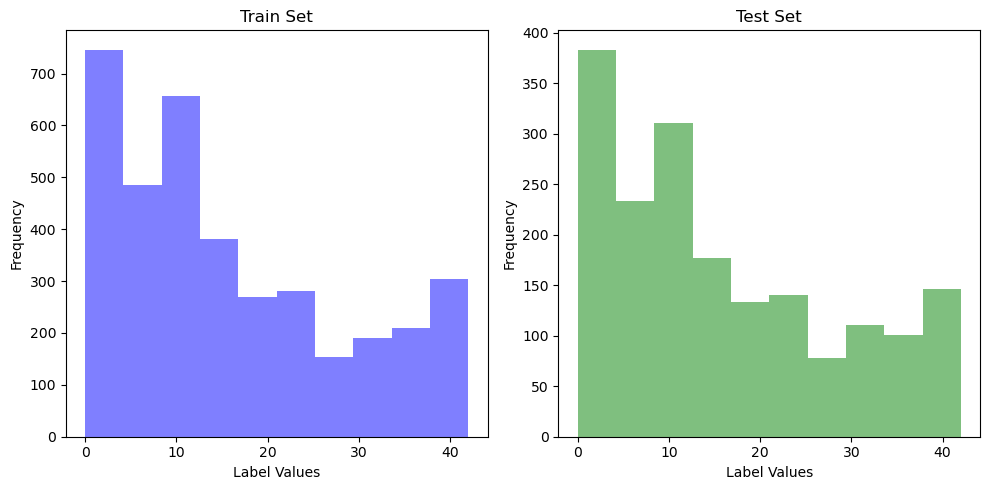

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train_features.drop(['image_path', 'ClassId'], axis=1)
y = train_features['ClassId']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=30027)

# checking the distribution of the data in the test and evaluation subsets.
# code taken from worksheet 8 of COMP30027 2025

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram for the train set on the left subplot
axs[0].hist(y_train.values.flatten(), bins=10, alpha=0.5, color='blue')
axs[0].set_xlabel('Label Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train Set')

# Plot histogram for the test set on the right subplot
axs[1].hist(y_eval.values.flatten(), bins=10, alpha=0.5, color='green')
axs[1].set_xlabel('Label Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test Set')

# Display the plot
plt.tight_layout()
plt.show()